## Descripción del proyecto
Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. Revisaremos y priorizaremos las hipótesis luego aplicaremos un test A/B para determinar cual grupo nos entrega mejores resultados.

## Objetivo:  
Priorizar las hipótesis, lanzar un test A/B y analizar los resultados.

## Etapas 
 
El proyecto consistirá en dos etapas:
 1. Descripción de los datos
 2. Priorizar hipótesis
 3. Análisis de test A/B

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [60]:
hypo   = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [61]:
# Primeras filas
hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [62]:
# Información general
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [63]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [64]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [65]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [66]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [67]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [68]:
orders.describe(exclude='number')

/tmp/ipykernel_26/2209965789.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(exclude='number')


,date,group
count,1197,1197
unique,31,2
top,2019-08-05 00:00:00,B
freq,48,640
first,2019-08-01 00:00:00,NaN
last,2019-08-31 00:00:00,NaN


In [69]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

In [70]:
orders.visitorId.nunique()

1031

In [71]:
orders.duplicated().sum()

0

In [72]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [73]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [74]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [75]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [76]:
visits.describe(exclude='number')

/tmp/ipykernel_26/248800429.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits.describe(exclude='number')


,date,group
count,62,62
unique,31,2
top,2019-08-27 00:00:00,A
freq,2,31
first,2019-08-01 00:00:00,NaN
last,2019-08-31 00:00:00,NaN


In [77]:
visits.duplicated().sum()

0

## Conclusión descripción de los datos
Tras analizar la información general corregimos formatos de fecha, encontramos datos atípicos que serán materia de investigación, no encontramos nulos ni duplicados aparentes. Finalmente sabemos que el periodo de prueba esta entre el 01-08-2019 y el 31-08-2019.

-------------------

## Priorizar hipótesis

In [78]:
hypo

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [79]:
# Metodo ICE
hypo['ICE'] = (hypo['Impact'] * hypo['Confidence']) / hypo['Effort']

print(hypo[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [80]:
# Metodo RICE
hypo['RICE'] = (hypo['Reach'] *  hypo['Impact'] * hypo['Confidence']) / hypo['Effort']

print(hypo[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [81]:
hypo

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


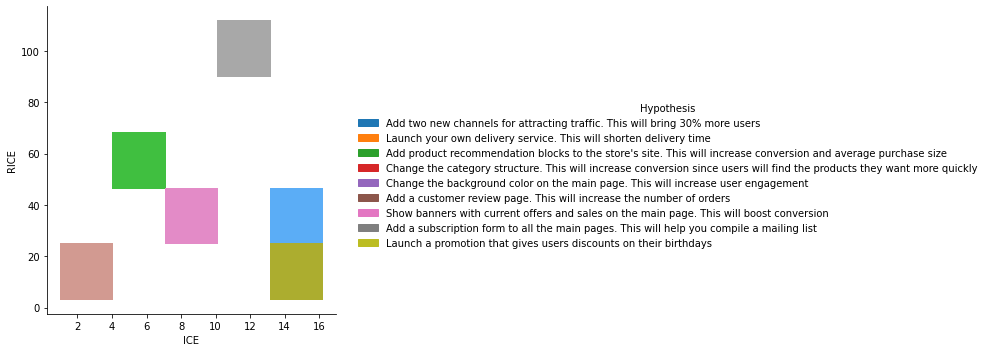

In [82]:
#plt.scatter(hypo['ICE'], hypo['RICE']);
sns.displot(data=hypo, x='ICE',y='RICE',hue='Hypothesis');

## Conclusión
Tras comparar el método ICE y RICE vemos que la hipótesis (Añadir un formulario de suscripción a todas las páginas principales) se posiciono en primer lugar en el método RICE, esto se debe a que RICE incorpora el parámetro alcance (cuántos usuarios se verán afectados) el cual según la escala de clasificación a la cual esta sometida le otorga un 10 dándole una prioridad máxima a este punto. Tras analizar el gráfico de dispersión, vemos que existe correlación entre RICE y ICE para posicionar a la hipótesis gris y verde como las mas prioritarias.

-----------------

## Análisis de test A/B

In [83]:
# Revisamos el grupo a
df_a = orders[orders['group'] == 'A'].reset_index()
df_a

,index,transactionId,visitorId,date,revenue,group
0,2,2961555356,4069496402,2019-08-15,10.2,A
1,7,2626614568,78758296,2019-08-15,20.1,A
2,8,1576988021,295230930,2019-08-15,215.9,A
3,10,3649131742,879864040,2019-08-15,65.7,A
4,12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...,...
552,1187,2274188238,132143192,2019-08-14,15.5,A
553,1188,1692103379,1022829655,2019-08-14,5.7,A
554,1193,2203539145,370388673,2019-08-14,50.1,A
555,1194,1807773912,573423106,2019-08-14,165.3,A


In [84]:
# Revisamos el grupo b
df_b = orders[orders['group'] == 'B'].reset_index()
df_b

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...,...
635,1189,4082620617,393266494,2019-08-14,490.4,B
636,1190,38478481,1197745035,2019-08-14,135.3,B
637,1191,3592955527,608641596,2019-08-14,255.7,B
638,1192,2662137336,3733762160,2019-08-14,100.8,B


In [85]:
# vemos quienes son los usuarios de a en b
df_ab = df_a[df_a['visitorId'].isin(df_b['visitorId'])].reset_index()
df_ab

,level_0,index,transactionId,visitorId,date,revenue,group
0,0,2,2961555356,4069496402,2019-08-15,10.2,A
1,9,26,2223239646,199603092,2019-08-15,55.7,A
2,10,29,2220299125,3803269165,2019-08-15,15.8,A
3,11,33,486237576,2378935119,2019-08-15,30.4,A
4,13,41,2594268419,237748145,2019-08-15,20.8,A
...,...,...,...,...,...,...,...
84,542,1167,3757656646,4186807279,2019-08-14,80.8,A
85,545,1173,3612788481,2712142231,2019-08-14,40.3,A
86,547,1178,4052155355,2949041841,2019-08-14,5.9,A
87,550,1183,1458356232,963407295,2019-08-14,80.0,A


In [86]:
# Filtramos la tabla para eliminar los usuarios
filtered = orders[~orders['visitorId'].isin(df_ab['visitorId'])].reset_index(drop=True)
filtered

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,255.7,B
1012,2662137336,3733762160,2019-08-14,100.8,B
1013,2203539145,370388673,2019-08-14,50.1,A
1014,1807773912,573423106,2019-08-14,165.3,A


Representaremos gráficamente el ingreso acumulado por grupo.

In [87]:
# Matriz con valores únicos de parejas fecha-grupo
datesGroups = filtered[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
6,2019-08-15,A
35,2019-08-16,A
37,2019-08-16,B
45,2019-08-01,A
...,...,...
913,2019-08-12,A
950,2019-08-13,B
952,2019-08-13,A
984,2019-08-14,B


In [88]:
# Obténemos los datos diarios acumulados agregados sobre los pedidos
ordersAggregated = datesGroups.apply(lambda x: filtered[np.logical_and(filtered['date'] <= x['date'],
filtered['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),
axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
45,2019-08-01,A,23,19,2266.6
54,2019-08-01,B,17,17,967.2
149,2019-08-02,A,42,36,3734.9
147,2019-08-02,B,40,39,3535.3
245,2019-08-03,A,66,60,5550.1


In [89]:
# Obténemos los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}),
axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visits
45,2019-08-01,A,719
54,2019-08-01,B,713
149,2019-08-02,A,1338
147,2019-08-02,B,1294
245,2019-08-03,A,1845


In [90]:
# fusionamos las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


In [91]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [92]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


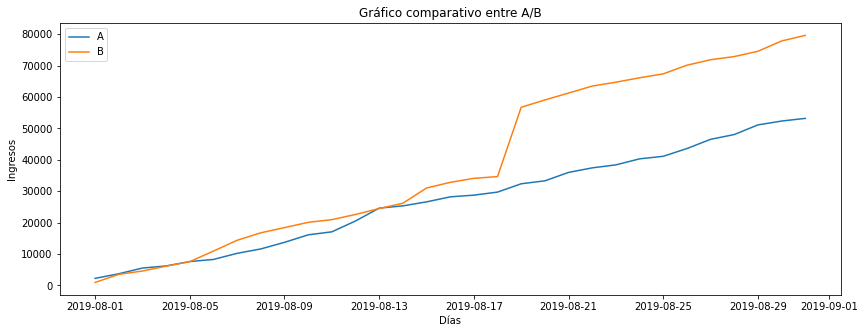

In [93]:
# Trazamos el gráfico de ingresos del grupo A
plt.figure(figsize=(14, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Gráfico comparativo entre A/B')
plt.ylabel('Ingresos')
plt.xlabel('Días')
plt.legend();

## Conclusión ingreso acumulado por grupo
Tras analizar el primer gráfico nos muestra que los ingresos aumentan constantemente, el grupo B muestra un alza significativa a partir del día 18 de agosto.

------------------------

Representaremos gráficamente el tamaño de pedido promedio acumulado por grupo.

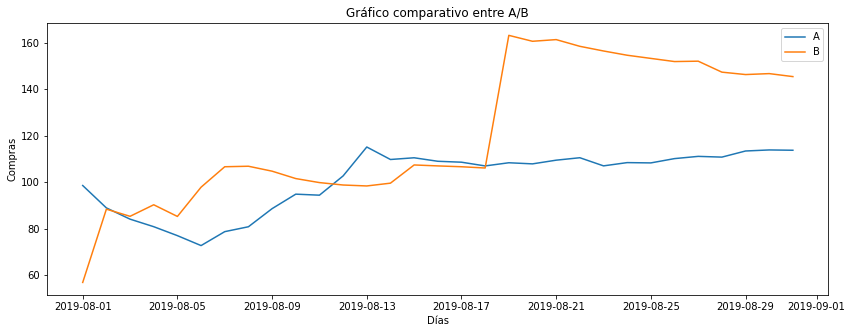

In [94]:
# Vamos a trazar el tamaño promedio de compra por grupo. Vamos a dividir los ingresos acumulados entre el número acumulado de pedidos:
plt.figure(figsize=(14, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Gráfico comparativo entre A/B')
plt.ylabel('Compras')
plt.xlabel('Días')
plt.legend();

## Conclusión tamaño promedio acumulado
El tamaño promedio de compra tiende a estabilizarse al final del periodo de prueba, También el grupo B muestra un alza significativa en su tamaño desde el día 18 de agosto. 

------------------

Representaremos gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

In [95]:
# reunimos los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


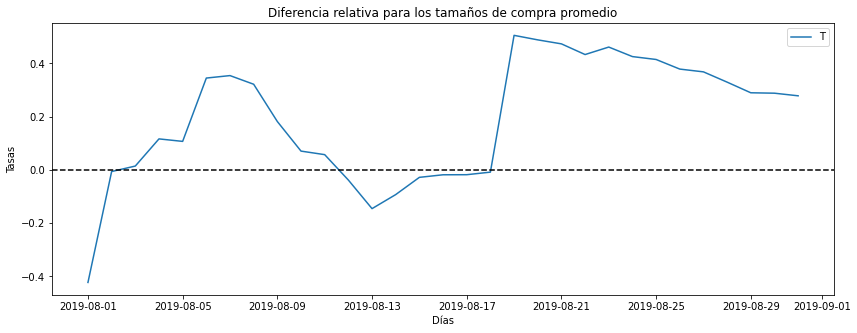

In [96]:
# trazamos un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(14, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Diferencia relativa para los tamaños de compra promedio')
plt.ylabel('Tasas')
plt.xlabel('Días')
plt.legend('Tendencia')
# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--');

## Conclusión diferencia relativa en el tamaño de pedido promedio acumulado
En varios puntos, la diferencia entre los segmentos aumenta. Esto significa que deben haber algunos pedidos grandes y valores atípicos.

--------------------------------

Calcularemos la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representaremos gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia.

In [97]:
# calculo de la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [98]:
# seleccionamos datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [99]:
# seleccionamos datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


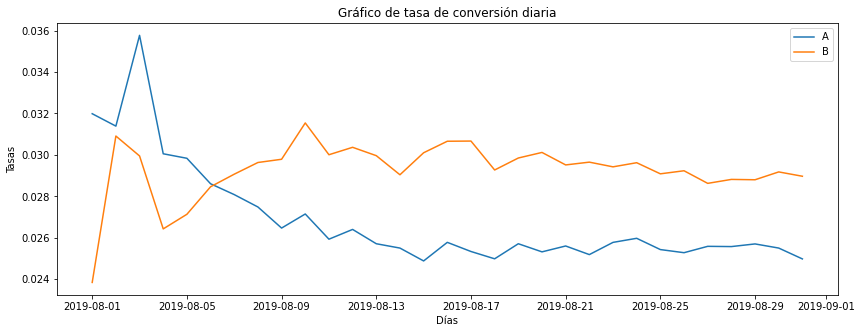

In [100]:
# trazamos los gráficos
plt.figure(figsize=(14, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Gráfico de tasa de conversión diaria')
plt.ylabel('Tasas')
plt.xlabel('Días')
plt.legend();

## Conclusión tasa de conversión diaria
Tanto el grupo B como el grupo A tienden a estabilizar su tasa de conversión al final de la muestra. ambos grupos fluctuaron en valores distintos, El grupo B una vez se estabilizó empezó a mostrar mejores números que A.

-------------------

In [101]:
# Vamos a trazar un gráfico de diferencia relativa para las tasas de conversión acumuladas:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


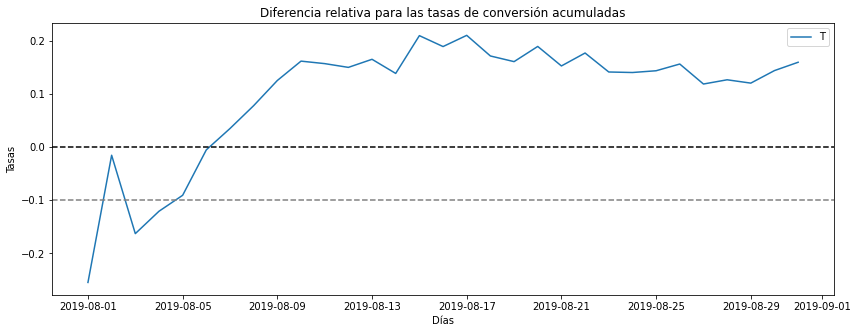

In [102]:
plt.figure(figsize=(14, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend('Tendencia')
plt.title('Diferencia relativa para las tasas de conversión acumuladas')
plt.ylabel('Tasas')
plt.xlabel('Días')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

## Conclusión diferencia relativa para las tasas de conversión acumulada
Al trazar un gráfico de diferencia relativa para las tasas de conversión acumulada vemos que B inicia por debajo de A pero luego tiene un alza a partir del 7 de agosto y luego se estabiliza al final del periodo.

-------------------------------

Trazaremos un gráfico de dispersión del número de pedidos por usuario.

In [103]:
# Vamos a buscar el número de pedidos por usuario e imprimir el resultado:
ordersByUsers = (
    filtered.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


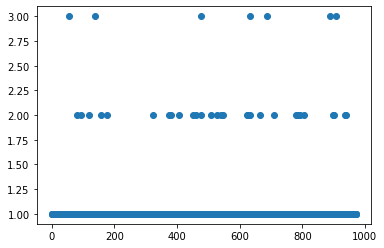

In [104]:
# Vamos a trazar un gráfico de dispersión con el número de pedidos por usuario:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);

## Conclusión dispersión del número de pedidos
Como muestra el gráfico de dispersión la mayoría de los clientes realizó un pedido, varios realizaron 2 pedidos y 7 usuarios realizaron 3 pedidos.

------------------------------------------------------------------------------

Calculamos los percentiles 95 y 99 para el número de pedidos por usuario. Definiremos el punto en el cual un punto de datos se convierte en una anomalía.

In [105]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


No mas del 5% de los usuarios realizaron 1 pedido y no mas del 1% realizó 2 pedidos. Por lo tanto, sería razonable establecer tres pedidos por usuario como límite inferior para el número de pedidos y filtrar las anomalías en base a ello.

Trazaremos un gráfico de dispersión de los precios de los pedidos.

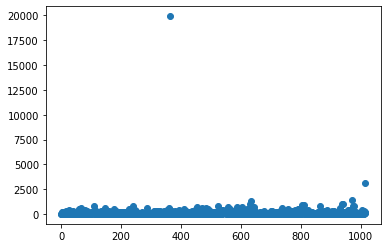

In [106]:
x_values = pd.Series(range(0, len(filtered['revenue'])))
plt.scatter(x_values, filtered['revenue']);

Calcularemos los percentiles 95 y 99 de los precios de los pedidos. Definiremos el punto en el cual un punto de datos se convierte en una anomalía.

In [107]:
print(np.percentile(filtered['revenue'], [95, 99]))

[414.275 830.3  ]


## Conclusión dispersión de ingresos por usuario
Según muestra el gráfico de conversión no mas del 5% de los ingresos son por 414. y no mas del 1 % cuesta 830.
Establecemos el ingreso de $2500 como base limite.

--------------------------------------------------

Encontraremos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [108]:
# Calculamos la significancia estadística de la diferencia de conversión entre los grupos.
ordersByUsersA = filtered[filtered['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [109]:
ordersByUsersB = filtered[filtered['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [110]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


## Conclusión significancia estadística de la diferencia en la conversión
La primera fila de la salida nos da el valor p 0.011, que es menor que 0,05. Entonces, rechazamos la hipótesis nula ya que si hay una diferencia estadísticamente significativa en la conversión entre los grupos. Pero la pérdida relativa del grupo B es del 16%.

--------------------

Encuentraremos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [111]:
# Encontramos la diferencia relativa en el tamaño promedio de pedido entre los grupos:
print('{0:.3f}'.format(stats.mannwhitneyu(filtered[filtered['group']=='A']['revenue'], filtered[filtered['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(filtered[filtered['group']=='B']['revenue'].mean()/filtered[filtered['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


## Conclusión significancia estadística de la diferencia en el tamaño promedio de pedido
El valor p es notablemente superior a 0,05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. No obstante, el tamaño de pedido promedio para el grupo B es mucho más pequeño que para el grupo A.

-----------------------

## Conclusión
Encontramos la presencia de 19 usuarios anómalos según nuestro criterio de 2 pedidos y sobre 830.

In [112]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = filtered[filtered['revenue'] > 830]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

937    148427295
33     249864742
58     611059232
811    887908475
632    888512513
dtype: int64
(19,)


-------------------------

Encuentraremos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [113]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')]
                            ,axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [114]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.006
0.192


## Conclusión
Tras aplicar el criterio estadístico de Mann-Whitney a nuestra tabla filtrada, concluimos que el valor de p disminuyó quedando por debajo de nuestro nivel de significancia por ende debemos rechazar la hipótesis ya que hay una diferencia estadísticamente significativa en la conversión entre los grupos. La perdida relativa pasó de 16% a 19%.

---------------------

Encuentraremos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [115]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    filtered[np.logical_and(
        filtered['group']=='A',
        np.logical_not(filtered['visitorId'].isin(abnormalUsers)))]['revenue'],
    filtered[np.logical_and(
        filtered['group']=='B',
        np.logical_not(filtered['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    filtered[np.logical_and(filtered['group']=='B',np.logical_not(filtered['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    filtered[np.logical_and(
        filtered['group']=='A',
        np.logical_not(filtered['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.877
-0.014


El valor de p aumentó pero ahora la diferencia entre los segmentos es del 1.4% en lugar del 27%.

-------------------------------------------------------------------------------------------------------------

Tras analizar los datos concluimos que:
* Hay una diferencia estadísticamente significativa en la conversión entre los grupos, según los datos sin procesar y filtrados.

* Los datos sin procesar no mostraron una diferencia estadísticamente significativa entre los grupos en cuanto a tamaño promedio de compra. Sin embargo, después de eliminar las anomalías, resultó que había una diferencia estadísticamente significativa.

* El gráfico de la diferencia de conversión entre los grupos muestra que los resultados del grupo B parten por debajo de A pero después del día 7 de agosto son mejores que los del grupo A: tienen tendencia a crecer o se estabilizaron alrededor de la media.

* Finalmente tomamos la decisión 1. Consideramos la prueba exitosamente y el grupo B se alzo como líder de la prueba.